In [4]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [6]:
df=pd.read_csv('Miles_Traveled.csv')

In [7]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [11]:
df.rename(columns={'DATE':'ds','TRFVOLUSM227NFWA':'y'},inplace=True)
# Rename Columns for Prophet

In [12]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [13]:
df['ds']=pd.to_datetime(df['ds'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
ds    588 non-null datetime64[ns]
y     588 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


In [15]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [19]:
# Plotly visualization
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

import cufflinks as cf

# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

4.5.0


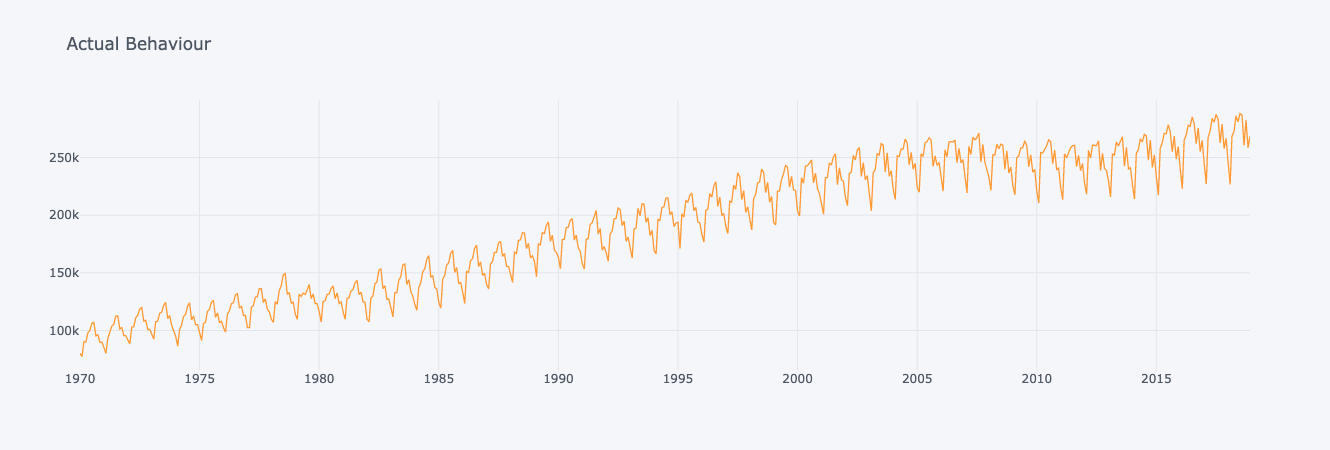

In [21]:
df.iplot(kind='line',x='ds',title='Actual Behaviour')

## Test Train Test

In [23]:
# Lets divide the train and test data. We will task last 12 data points as test data

In [24]:
len(df)

588

In [25]:
train = df.iloc[:576]
test = df.iloc[576:]

## Prophet Model 

In [29]:
m=Prophet()
m.fit(train)
future=m.make_future_dataframe(periods=12,freq='MS')
forecast=m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263348.877048,273851.643126,285763.401724,263278.202323,263421.700120,16448.763644,16448.763644,16448.763644,16448.763644,16448.763644,16448.763644,0.0,0.0,0.0,279797.640692
584,2018-09-01,263489.606772,256047.126018,267633.691877,263396.418607,263593.018536,-1669.492450,-1669.492450,-1669.492450,-1669.492450,-1669.492450,-1669.492450,0.0,0.0,0.0,261820.114321
585,2018-10-01,263625.796827,263149.958359,274849.956307,263496.443835,263756.263944,5307.799177,5307.799177,5307.799177,5307.799177,5307.799177,5307.799177,0.0,0.0,0.0,268933.596004
586,2018-11-01,263766.526551,250009.752712,261527.361458,263605.576503,263936.242780,-8206.692440,-8206.692440,-8206.692440,-8206.692440,-8206.692440,-8206.692440,0.0,0.0,0.0,255559.834111
587,2018-12-01,263902.716607,251362.296537,263193.268299,263706.087452,264122.388101,-6920.633214,-6920.633214,-6920.633214,-6920.633214,-6920.633214,-6920.633214,0.0,0.0,0.0,256982.083393


In [48]:
forecast2=forecast.iloc[576:]

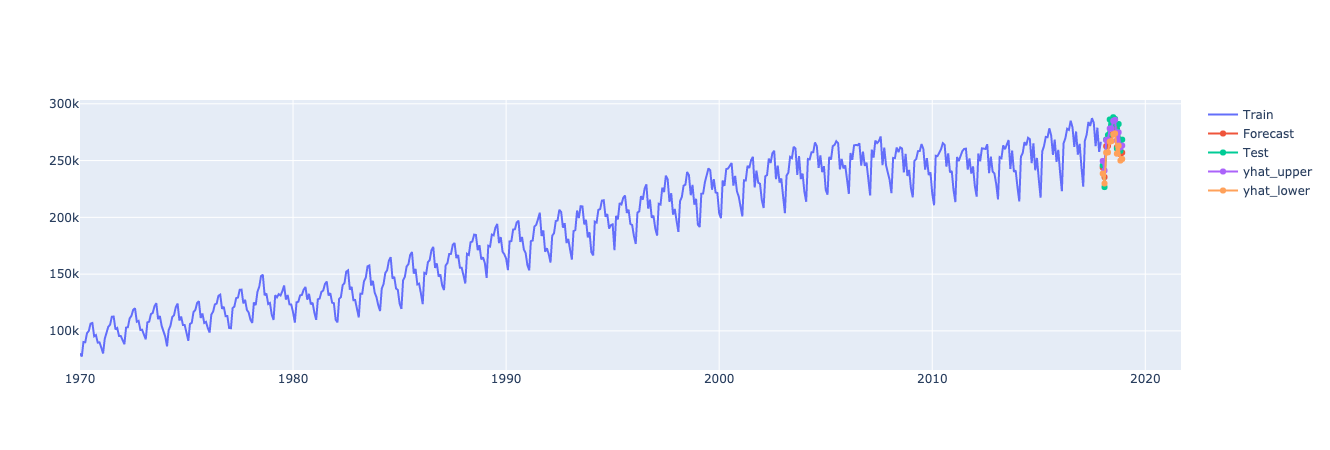

In [49]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=train['ds'],
        y=train['y'],
        name='Train'
    ))

fig.add_trace(
    go.Scatter(
        x=forecast2['ds'],
        y=forecast2['yhat'],
        name='Forecast'
    ))
fig.add_trace(
    go.Scatter(
        x=test['ds'],
        y=test['y'],
        name='Test'
    ))
fig.add_trace(
    go.Scatter(
        x=forecast2['ds'],
        y=forecast2['yhat_upper'],
        name='yhat_upper'
    ))
fig.add_trace(
    go.Scatter(
        x=forecast2['ds'],
        y=forecast2['yhat_lower'],
        name='yhat_lower'
    ))

fig.show()

# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iplot(kind='line',x='ds',title='Actual Behaviour')
# train.iplot(kind='line',x='ds',title='Actual Behaviour')

In [38]:
train.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [50]:
# Calculate the error rate : RMSE

In [51]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-12:]['yhat']

In [52]:
predictions

576    243796.609534
577    235426.627562
578    262627.330849
579    262828.742010
580    272552.156586
581    272803.877580
582    279261.432668
583    279797.640692
584    261820.114321
585    268933.596004
586    255559.834111
587    256982.083393
Name: yhat, dtype: float64

In [53]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [54]:
rmse(test['y'],predictions)

8661.095901709492

In [55]:
test.mean()

y    268739.666667
dtype: float64

In [60]:
8661.095901709492/268739.666667

0.03222857276384735

## Cross validation

In [62]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [63]:
# Cross validation  we need to keep three things in mind. #Initial #Period #Horizon

In [65]:
#Initial 
initial= 5*365
initial=str(initial)+' days'
print(initial)


1825 Days


In [66]:
#Period 
period= 5*365
period=str(period)+' days'
print(period)

1825 days


In [67]:
#Horizon
horizon= 365
horizon=str(horizon)+' days'
print(horizon)

365 days


In [72]:
df_cv=cross_validation(m,initial=initial,period=period,horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [73]:
len(df_cv)

108

In [74]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,coverage
0,52 days,2.475016e+07,4974.953321,4574.792884,0.027989,0.3
1,53 days,2.225769e+07,4717.805405,4310.286545,0.025251,0.3
2,54 days,1.881510e+07,4337.637524,3795.378420,0.020424,0.4
3,55 days,2.372965e+07,4871.309349,4310.859315,0.023444,0.3
4,57 days,2.148966e+07,4635.693756,4041.835674,0.021690,0.4
5,58 days,2.375941e+07,4874.362205,4318.457749,0.022894,0.3
6,59 days,3.856195e+07,6209.826735,5136.181340,0.026582,0.3
7,60 days,3.958566e+07,6291.713893,5221.041143,0.027141,0.3
8,62 days,3.772553e+07,6142.111310,4976.625537,0.026069,0.4
9,80 days,3.263659e+07,5712.844577,4355.134556,0.023947,0.5


In [81]:
# MSE: calculates mean squared error
# RMSE: calculates the root mean squared error
# MAE: calculates the mean absolute error
# MAPE: calculates the mean absolute percentage error
# SMAPE: calculates the symmetric mean absolute percentage error

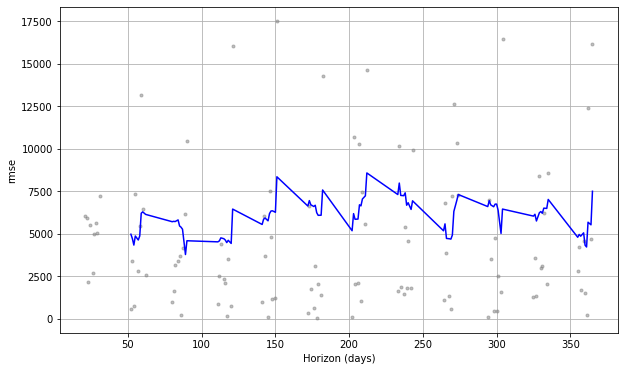

In [84]:
plot_cross_validation_metric(df_cv,metric='rmse');

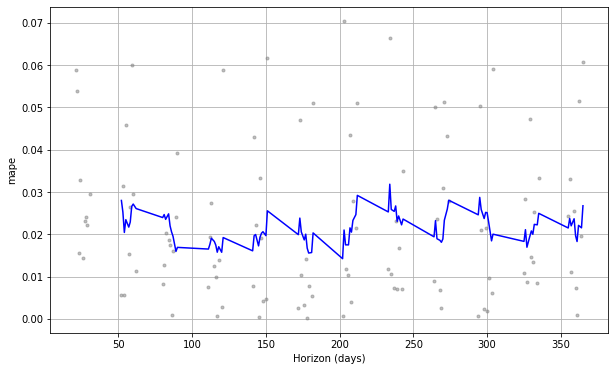

In [85]:
plot_cross_validation_metric(df_cv,metric='mape');